In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
Bn = pd.read_csv("/content/BankNote_Authentication.csv")

In [2]:
Bn

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
print('Number of Rows: ', Bn.shape[0])
print('Number of Columns: ', Bn.shape[1], '\n')
print('SubSet of Data:\n ', Bn.head(), '\n')

Number of Rows:  1372
Number of Columns:  5 

SubSet of Data:
     variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 



In [4]:
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'class']
Bn.columns = labels
print('Columns Names:', Bn.columns, '\n')
print('Data Describe:\n ', Bn.describe(), '\n')
print('Data Information:'); print(Bn.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'class'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1  

In [5]:
# Check For duplicated
print(Bn.duplicated().any())
duplicated = Bn.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  24


Correlation:
class       1.000000
Kurtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: class, dtype: float64


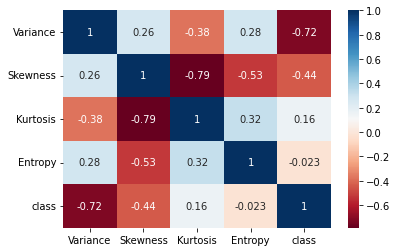

In [6]:
print('Correlation:')
print(Bn.corr()['class'].sort_values(ascending=False))
sns.heatmap(Bn.corr(), annot=True, cmap="RdBu")
plt.show()

In [7]:
print('Number of Authentication= ', Bn['class'][Bn['class'] == 0].count())
print('Number of Unauthenticated= ', Bn['class'][Bn['class'] == 1].count())

Number of Authentication=  762
Number of Unauthenticated=  610


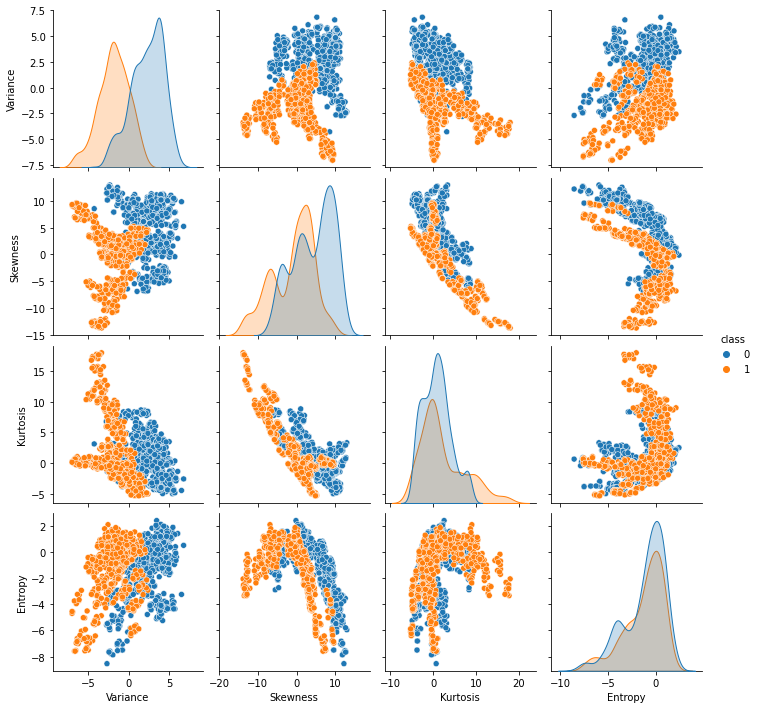

In [8]:
sns.pairplot(data=Bn, hue='class')
plt.show()

In [9]:
X = Bn.iloc[:,:-1]
y = Bn.iloc[:,-1]

In [10]:
X.head(20)

,Variance,Skewness,Kurtosis,Entropy
0,3.62160,8.6661,-2.80730,-0.44699
1,4.54590,8.1674,-2.45860,-1.46210
2,3.86600,-2.6383,1.92420,0.10645
3,3.45660,9.5228,-4.01120,-3.59440
4,0.32924,-4.4552,4.57180,-0.98880
5,4.36840,9.6718,-3.96060,-3.16250
6,3.59120,3.0129,0.72888,0.56421
7,2.09220,-6.8100,8.46360,-0.60216
8,3.20320,5.7588,-0.75345,-0.61251
9,1.53560,9.1772,-2.27180,-0.73535


In [11]:
y.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: class, dtype: int64

แบ่งข้อมูล

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Accuracy of Logistic Regression Algorithm:  98.7864077669903


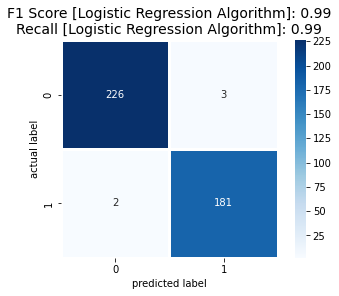

In [13]:
log = LogisticRegression()

# fitting data
model = log.fit(X_train, y_train)

# Predicted data
y_predicted = log.predict(X_test)

# Logistic Regression Results
print('Classification Report:')
print(metrics.classification_report(y_test, y_predicted))

# Accuarcy score matrix
accuracy_log = (metrics.accuracy_score(y_test, y_predicted)*100)
print('Accuracy of Logistic Regression Algorithm: '
      ,accuracy_log )

# F1 Score
f1_score_log = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion martrix
cm_log = metrics.confusion_matrix(y_test, y_predicted)

# recall 
recall_log = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [Logistic Regression Algorithm]: {f1_score_log:.2f}\n'
          f'Recall [Logistic Regression Algorithm]: {recall_log:.2f}', size=14, color='black')
plt.show()

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of KNN Algorithm:  100.0


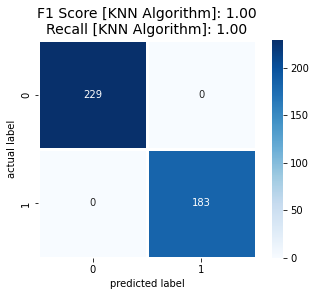

In [14]:
# KNN Algorithm
knn = KNeighborsClassifier(n_neighbors=5)

# fitting training data
knn.fit(X_train, y_train)

# predicted data
y_predicted = knn.predict(X_test)

# KNN Results

# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
accuracy_knn = (metrics.accuracy_score(y_test, y_predicted)*100)
print('Accuracy of KNN Algorithm: '
      ,accuracy_knn )
# F1 Score
f1_score_knn = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_knn = metrics.confusion_matrix(y_test, y_predicted)

# recall
recall_KNN = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall 
plt.title(f'F1 Score [KNN Algorithm]: {f1_score_knn:.2f}\n'
          f'Recall [KNN Algorithm]: {recall_KNN:.2f}', size=14, color='black')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       229
           1       0.86      0.75      0.80       183

    accuracy                           0.84       412
   macro avg       0.84      0.83      0.83       412
weighted avg       0.84      0.84      0.84       412

Accuracy of Naive Bayes Algorithm:  83.7378640776699


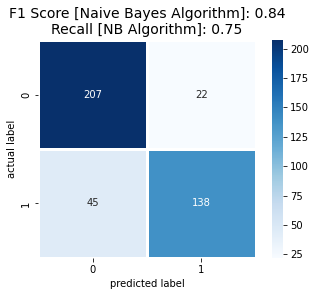

In [15]:
# Naive Bayes Algorithm
gnb = GaussianNB()

# fitting training data
model = gnb.fit(X_train, y_train)

# predicted data
y_predicted = gnb.predict(X_test)

# Naive Bayes Results
print('Classification Report:')
print(metrics.classification_report(y_test, y_predicted))

# Accuracy Score matrix
accuracy_NB = (metrics.accuracy_score(y_test, y_predicted)*100)
print('Accuracy of Naive Bayes Algorithm: '
      , accuracy_NB)

# F1 Score
f1_score_NB = metrics.f1_score(y_test, y_predicted, average='micro')

# Confusion matrix
cm_mnb = metrics.confusion_matrix(y_test, y_predicted)

# recall
recall_NB = metrics.recall_score(y_test, y_predicted)

# Heatmap confusion matrix 
sns.heatmap(cm_mnb, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall 
plt.title(f'F1 Score [Naive Bayes Algorithm]: {f1_score_NB:.2f}\n'
          f'Recall [NB Algorithm]: {recall_NB:.2f}', size=14, color='black')
plt.show()

Classification Reports:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of SVM Algorithm:  100.0


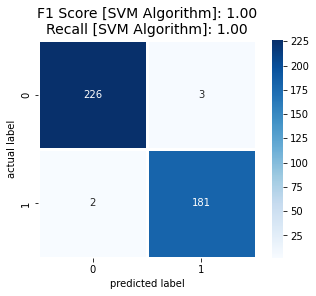

In [16]:
# Support Vector Machine
# The best SVM "rdf kernel and C=100"
# SVM with c=100.0
svm = SVC(kernel='rbf', C=100.0)

# Fitting data
svm.fit(X_train, y_train)

# predicted data
y_predict = svm.predict(X_test)

# SVM Results
print('Classification Reports:')
print(metrics.classification_report(y_test, y_predict))

# Accuracy score matrix
accuracy_svm = (metrics.accuracy_score(y_test, y_predict)*100)
print('Accuracy of SVM Algorithm: '
      ,accuracy_svm)

# F1 Score
f1_score_SVM = metrics.f1_score(y_test, y_predict, average='micro')

# confusion matrix
cm_SVM = metrics.confusion_matrix(y_test, y_predict)

# recall 
recall_SVM = metrics.recall_score(y_test, y_predict)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [SVM Algorithm]: {f1_score_SVM:.2f}\n'
          f'Recall [SVM Algorithm]: {recall_SVM:.2f}', size=14, color='black')
plt.show()
print('\n')

Classification Reports:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       229
           1       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

Accuracy of DecisionTree Algorithm:  98.30097087378641


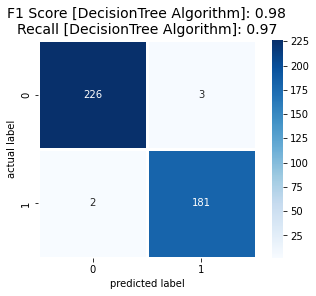

In [17]:
# DecisionTree
clf = tree.DecisionTreeClassifier()

# Fitting data
clf.fit(X_train,y_train)

# predicted data
y_pred = clf.predict(X_test)

# DecisionTree Results
print('Classification Reports:')
print(metrics.classification_report(y_test, y_pred))

# Accuracy score matrix
accuracy_dt = (metrics.accuracy_score(y_test, y_pred)*100)
print('Accuracy of DecisionTree Algorithm: '
      ,accuracy_dt)

# F1 Score
f1_score_DecisionTree = metrics.f1_score(y_test, y_pred, average='micro')

# confusion matrix
cm_DecisionTree = metrics.confusion_matrix(y_test, y_pred)

# recall 
recall_DecisionTree = metrics.recall_score(y_test, y_pred)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [DecisionTree Algorithm]: {f1_score_DecisionTree:.2f}\n'
          f'Recall [DecisionTree Algorithm]: {recall_DecisionTree:.2f}', size=14, color='black')
plt.show()
print('\n')

Classification Reports:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       229
           1       0.99      0.97      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

Accuracy of RandomForest Algorithm:  98.30097087378641


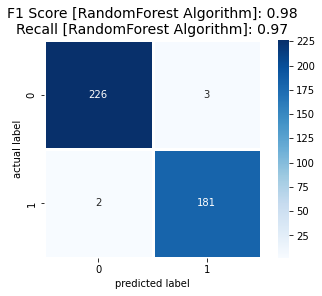

In [18]:
# RandomForest
rmf = RandomForestClassifier()

# Fitting data
rmf.fit(X_train,y_train)

# predicted data
y_pred = clf.predict(X_test)

# RMF Results
print('Classification Reports:')
print(metrics.classification_report(y_test, y_pred))

# Accuracy score matrix
accuracy_rmf = (metrics.accuracy_score(y_test, y_pred)*100) 
print('Accuracy of RandomForest Algorithm: '
      ,accuracy_rmf )

# F1 Score
f1_score_RandomForest = metrics.f1_score(y_test, y_pred, average='micro')

# confusion matrix
cm_RandomForest = metrics.confusion_matrix(y_test, y_pred)

# recall 
recall_RandomForest = metrics.recall_score(y_test, y_pred)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [RandomForest Algorithm]: {f1_score_RandomForest:.2f}\n'
          f'Recall [RandomForest Algorithm]: {recall_RandomForest:.2f}', size=14, color='black')
plt.show()
print('\n')

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Split the data into input features and target
X = Bn.drop('class', axis=1)
y = Bn['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network architecture
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


Classification Reports:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       1.00      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Accuracy of Neuralnetworkt Algorithm:  100.0


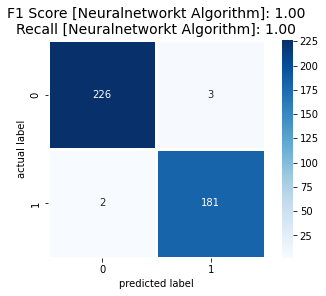

In [20]:
# Neuralnetworkt
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

# Fitting data
mlp.fit(X_train, y_train)

# predicted data
y_pred = mlp.predict(X_test)

# Neuralnetworkt Results
print('Classification Reports:')
print(metrics.classification_report(y_test, y_pred))

# Accuracy score matrix
accuracy_nlnw = (metrics.accuracy_score(y_test, y_pred)*100)
print('Accuracy of Neuralnetworkt Algorithm: '
      ,accuracy_nlnw )

# F1 Score
f1_score_Neuralnetwork = metrics.f1_score(y_test, y_pred, average='micro')

# confusion matrix
cm_Neuralnetworkt = metrics.confusion_matrix(y_test, y_pred)

# recall 
recall_Neuralnetwork = metrics.recall_score(y_test, y_pred)

# Heatmap confusion matrix 
sns.heatmap(cm_log, annot=True, fmt=".0f", linewidths=3, square=True, cmap='Blues', color="#cd1076")
plt.ylabel('actual label')
plt.xlabel('predicted label')

# show F1 Score and Recall
plt.title(f'F1 Score [Neuralnetworkt Algorithm]: {f1_score_Neuralnetwork:.2f}\n'
          f'Recall [Neuralnetworkt Algorithm]: {recall_Neuralnetwork:.2f}', size=14, color='black')
plt.show()
print('\n')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Split the data into input features and target
X = Bn.drop('class', axis=1)
y = Bn['class']

# Define the neural network architecture
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=150, batch_size=10)

# Evaluate the model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
138/138 [==============================] - 2s 2ms/step - loss: 0.3837 - accuracy: 0.8586
Epoch 2/150
138/138 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9854
Epoch 3/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9956
Epoch 4/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9964
Epoch 5/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9993
Epoch 6/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9993
Epoch 7/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 8/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 1.0000
Epoch 9/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 10/150
138/138 [==============================] - 0s 2ms/step - loss: 0.0056 - accura

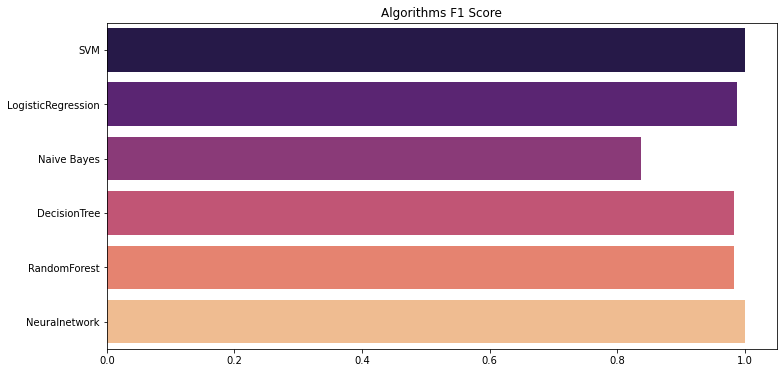

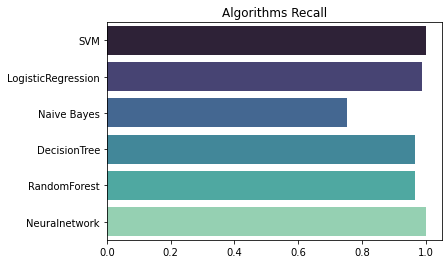

In [ ]:
plt.figure(figsize=(12, 6))
model_f1_score = [f1_score_SVM, f1_score_log,f1_score_NB,f1_score_DecisionTree,f1_score_RandomForest,f1_score_Neuralnetwork]
recalls = [recall_SVM, recall_log,recall_NB,recall_DecisionTree,recall_RandomForest,recall_Neuralnetwork]
model_name = ['SVM', 'LogisticRegression', 'Naive Bayes','DecisionTree','RandomForest','Neuralnetwork']
recall_name = ['SVM', 'LogisticRegression', 'Naive Bayes','DecisionTree','RandomForest','Neuralnetwork']

# Barplot f1 score
sns.barplot(x=model_f1_score, y=model_name, palette='magma')
plt.title('Algorithms F1 Score')
plt.show()

# barplot recall 
sns.barplot(x=recalls, y=recall_name, palette="mako")
plt.title('Algorithms Recall')
plt.show()

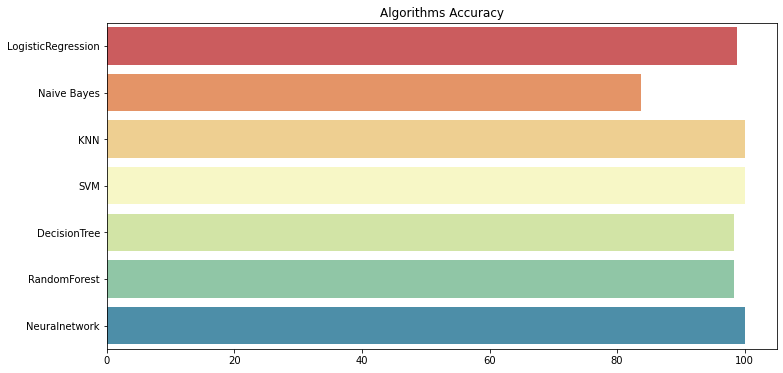

In [ ]:
plt.figure(figsize=(12, 6))
accuracyall =[accuracy_log,accuracy_NB,accuracy_knn,accuracy_svm,accuracy_dt,accuracy_rmf,accuracy_nlnw]
model_name = [ 'LogisticRegression', 'Naive Bayes', 'KNN','SVM','DecisionTree','RandomForest','Neuralnetwork']

# Barplot f1 score
sns.barplot(x=accuracyall, y=model_name, palette="Spectral")
plt.title('Algorithms Accuracy')
plt.show()